In [6]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import h5py
import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker

## the spectral density results [to be updated] ##

## Compute the continuum ##

In [7]:

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = config["grid"]["Lx"]
Ly = config["grid"]["Ly"]
cutoff = config["physics"]["cutoff"]
N = config["physics"]["N"]
UIB = config["physics"]["UIB"]
M = Lx * Ly

dJUs = np.linspace(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])

UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]
dJUs = np.linspace(**config["lists"]["dJUs"])

grid = Grid(Lx, Ly)

epss = np.zeros((len(dJUs), Lx * Ly * N))
omegs = np.zeros((len(dJUs), Lx * Ly * N))
pertE = np.zeros(len(dJUs))
dJUs_rep = np.zeros((len(dJUs), Lx * Ly * N))
for dJU_ind in range(0, len(dJUs)):
    dJU = dJUs[dJU_ind]
    print(dJU)
    params = Params(N, dJU, muU, UIB, cutoff)
    gs = groundstate(params)
    cns = gs.cns()
    n0 = gs.n0(cns)
    psi0 = gs.psi0(cns)
    exc = excitations(grid, params, gs, cns)
    uks, vks, omegaklambda = exc.calculate_matrices()
    verts = vertices(grid, gs, uks, vks, cns, n0)

    # the rayleigh schrodinger result
    pert = perturbative(grid, params, verts, omegaklambda)
    Pert_Energy = pert.perturbative_energy(n0)
    pertE[dJU_ind] = Pert_Energy[0] + Pert_Energy[1] + Pert_Energy[2]

    Epol = 0
    self_energy = Self_Energy(Epol, grid, params, verts, omegaklambda)
    omegs[dJU_ind, :] = self_energy.omega_vec()
    epss[dJU_ind, :] = dJU * self_energy.epsI_vec()
    dJUs_rep[dJU_ind, :] = np.ones(Lx * Ly * N) * dJU
    
continuum = omegs + epss


0.0
Norm is negative
Norm is negative
Norm is negative
Norm is negative
0.02631578947368421


/home/victor/Documents/BoseHubbard/src/class_perturbation.py:128: RuntimeWarning: invalid value encountered in scalar divide
  pow(UIB, 2)
/home/victor/Documents/BoseHubbard/src/class_perturbation.py:139: RuntimeWarning: invalid value encountered in scalar divide
  Sigma2 = Sigma2 + pow(UIB, 2) / 2 * abs(


0.05263157894736842
0.07894736842105263
0.10526315789473684
0.13157894736842105
0.15789473684210525
0.18421052631578946
0.21052631578947367
0.23684210526315788
0.2631578947368421
0.2894736842105263
0.3157894736842105
0.3421052631578947
0.3684210526315789
0.39473684210526316
0.42105263157894735
0.4473684210526315
0.47368421052631576
0.5


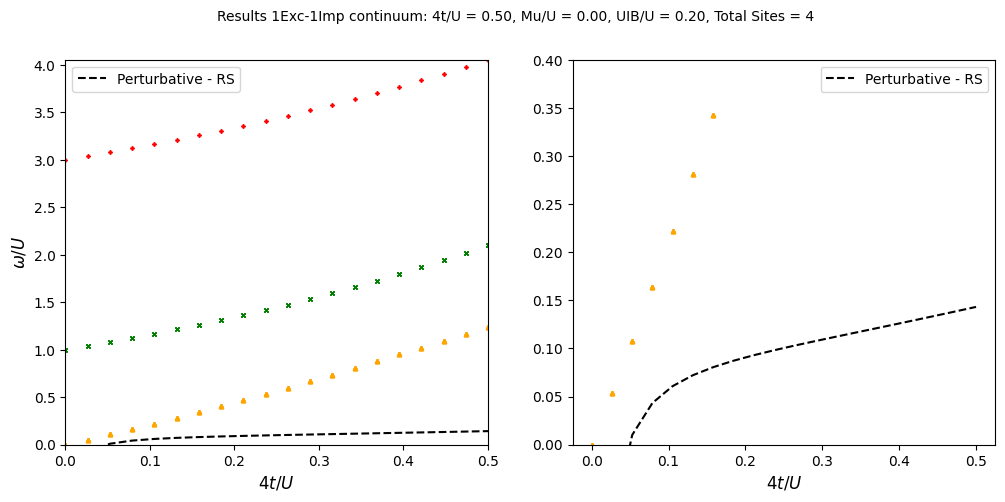

In [8]:
################ WEIRD PROBLEM HERE WITH 0:M, SHOULD BE ZERO? ################
## Add Labels  ## 
## Add save functions for data and figs ##

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

msize = 3
for dJU_ind in range(0, len(dJUs)):
    ax1.plot(dJUs_rep[dJU_ind, 2*M : 3*M], continuum[dJU_ind, 2*M: 3*M ], 'x', color="green",markersize = msize)
    ax1.plot(dJUs_rep[dJU_ind, 2*M : 3*M], continuum[dJU_ind, M: 2*M ], '^', color="orange", markersize = msize)
    ax1.plot(dJUs_rep[dJU_ind, 2*M : 3*M], continuum[dJU_ind, 3*M: 4*M ], '+', color="red", markersize = msize)
    ax2.plot(dJUs_rep[dJU_ind, 2*M : 3*M], continuum[dJU_ind, 2*M: 3*M ], 'x', color="green",markersize = msize)
    ax2.plot(dJUs_rep[dJU_ind, 2*M : 3*M], continuum[dJU_ind, M: 2*M ], '^', color="orange", markersize = msize)
    ax2.plot(dJUs_rep[dJU_ind, 2*M : 3*M], continuum[dJU_ind, 3*M: 4*M ], '+', color="red", markersize = msize)

ax1.set_xlabel(r'$4t/U$', fontsize=12)
ax2.set_xlabel(r'$4t/U$', fontsize=12)
ax1.set_ylabel(r'$\omega/U$', fontsize=12)


ax1.plot(dJUs, pertE, linestyle='--', label='Perturbative - RS', color='black', linewidth=1.5)
ax2.plot(dJUs, pertE, linestyle='--', label='Perturbative - RS', color='black', linewidth=1.5)
fig.suptitle(f"Results 1Exc-1Imp continuum: Mu/U = {muU:0.2f}, UIB/U = {UIB:0.2f}, Total Sites = {M}", fontsize = 10)
ax1.set_ylim(np.min(continuum[:,:4*M]), np.max(continuum[:,:4*M]))
ax2.set_ylim(0, 2*UIB)
ax1.set_xlim(min(dJUs), max(dJUs))
ax1.legend()
ax2.legend()
plt.show()


In [9]:
## Save the figure 
filename = f'../figs/Continuum/dJU_{dJU}_Mu_{muU:.2f}_M_{grid.M}_N_{N}_num_dJU_{len(dJUs)}.pdf'
fig.savefig(filename, dpi=300, bbox_inches='tight')